<center>

   Inverse Transformation Method </h1>
    </center>

#### Thanoj Muddana


### Exercise 1


Suppose X has density $f_{x}(s) = 2s\textbf{1}\{s \in [0,1] \}$.

**Explain in video.** Generate 1000 random variables from X's distribution. Remember to show any math needed to do this. Then plot them in a histogram and add a line of the target density for comparison.

Hint: if you set the seed to 1, the histogram should look like this (you need to also add the line though):

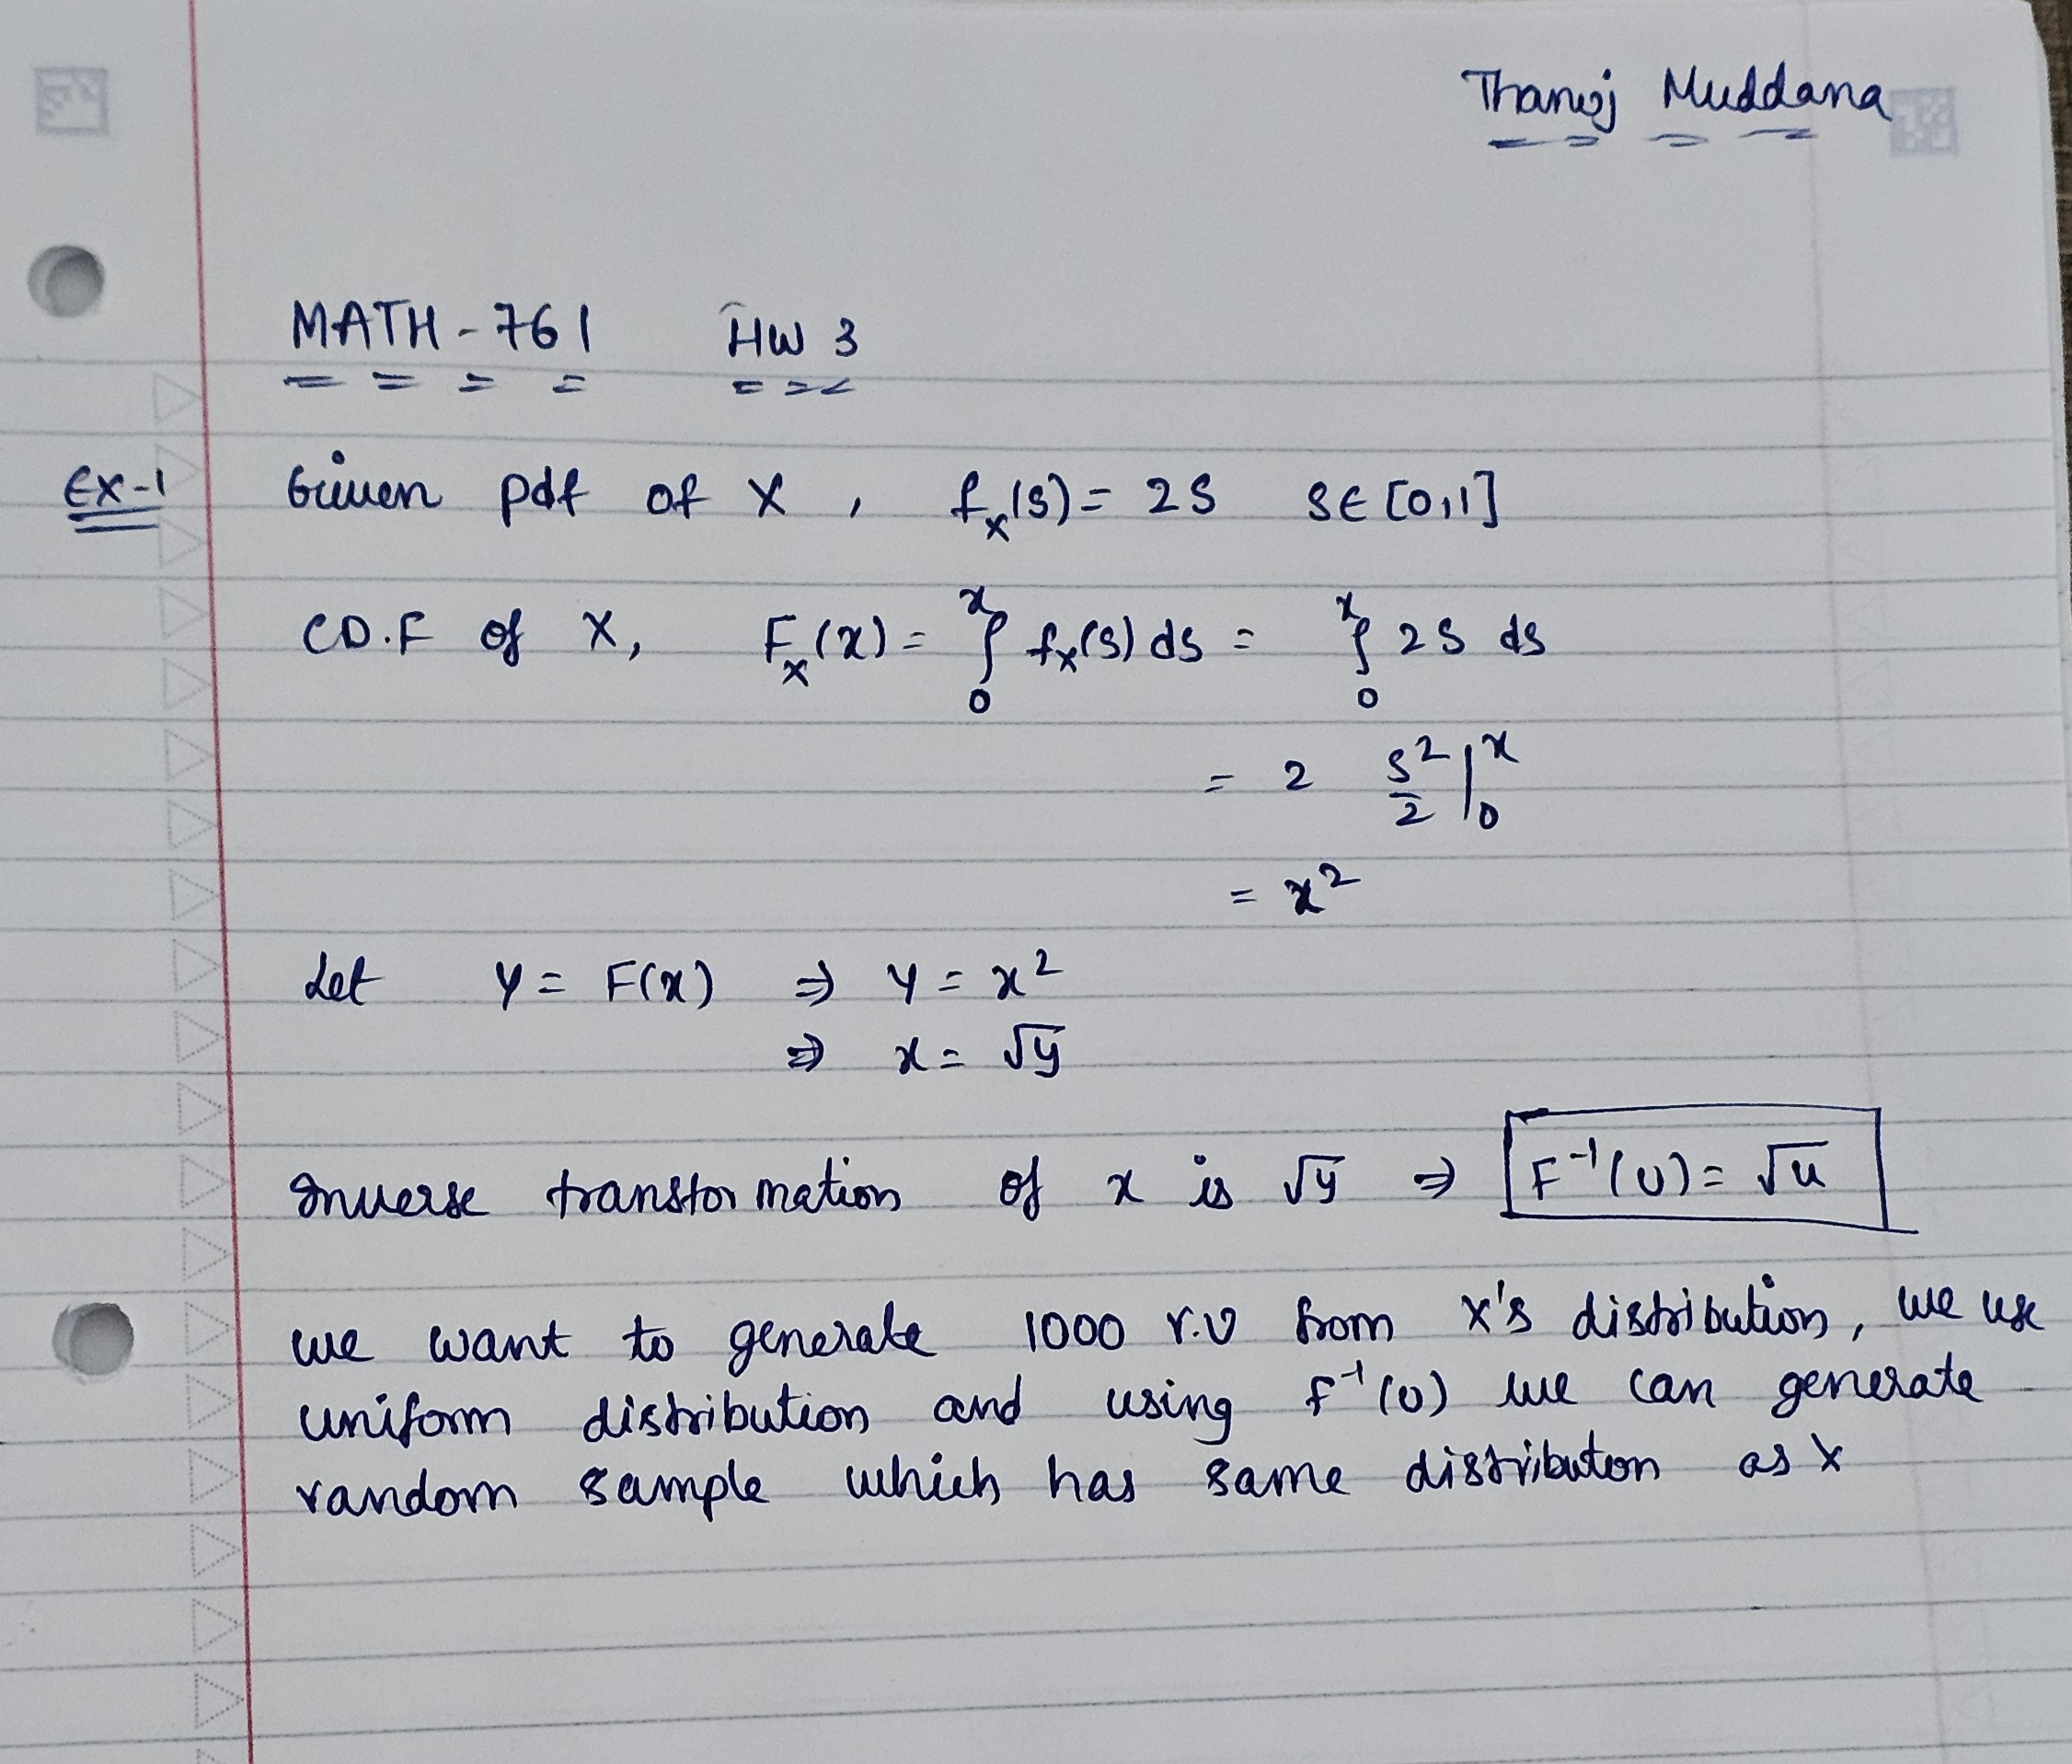

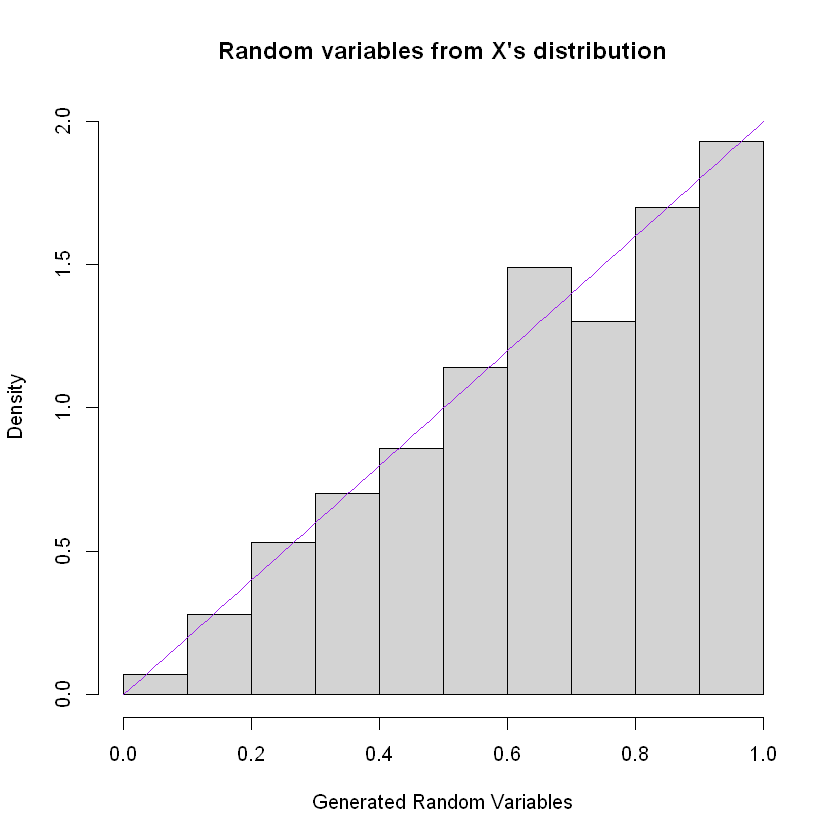

In [5]:
set.seed(1)
sample_size=1000
#generate uniform random sample
Uniform_Sample=runif(sample_size,0,1)
#Using inverse function of X, we can generate random variables for X
Inverse_Transformed_Sample= sqrt(Uniform_Sample)

hist(Inverse_Transformed_Sample,prob=TRUE,main="Random variables from X's distribution",xlab="Generated Random Variables", ylim=c(0,2))
s <- seq(0, 1, by=0.01) #support of s is 0 to 1
lines(s, 2*s, col = "Purple")

The histogram bars closely follow the theoretical line 2s, showing that the random variables  generated align well with the theoretical distribution of X.


### Exercise 2

The Pareto(a,b) distirbution has cdf

$$F(x) = 1-\left(\frac{b}{x}\right)^a, \quad x \geq b > 0, \quad a >0$$

**Explain in Video**: Generate a random sample of 1000 Pareto(2,2) rvs, showing all work for any math you used as well. Graph the density histogram of the sample with the Pareto(2,2) density superimposed for comparison.

Hint: if you set the seed to 1, the first x value you should generate from Pareto(2,2) is `2.333655.

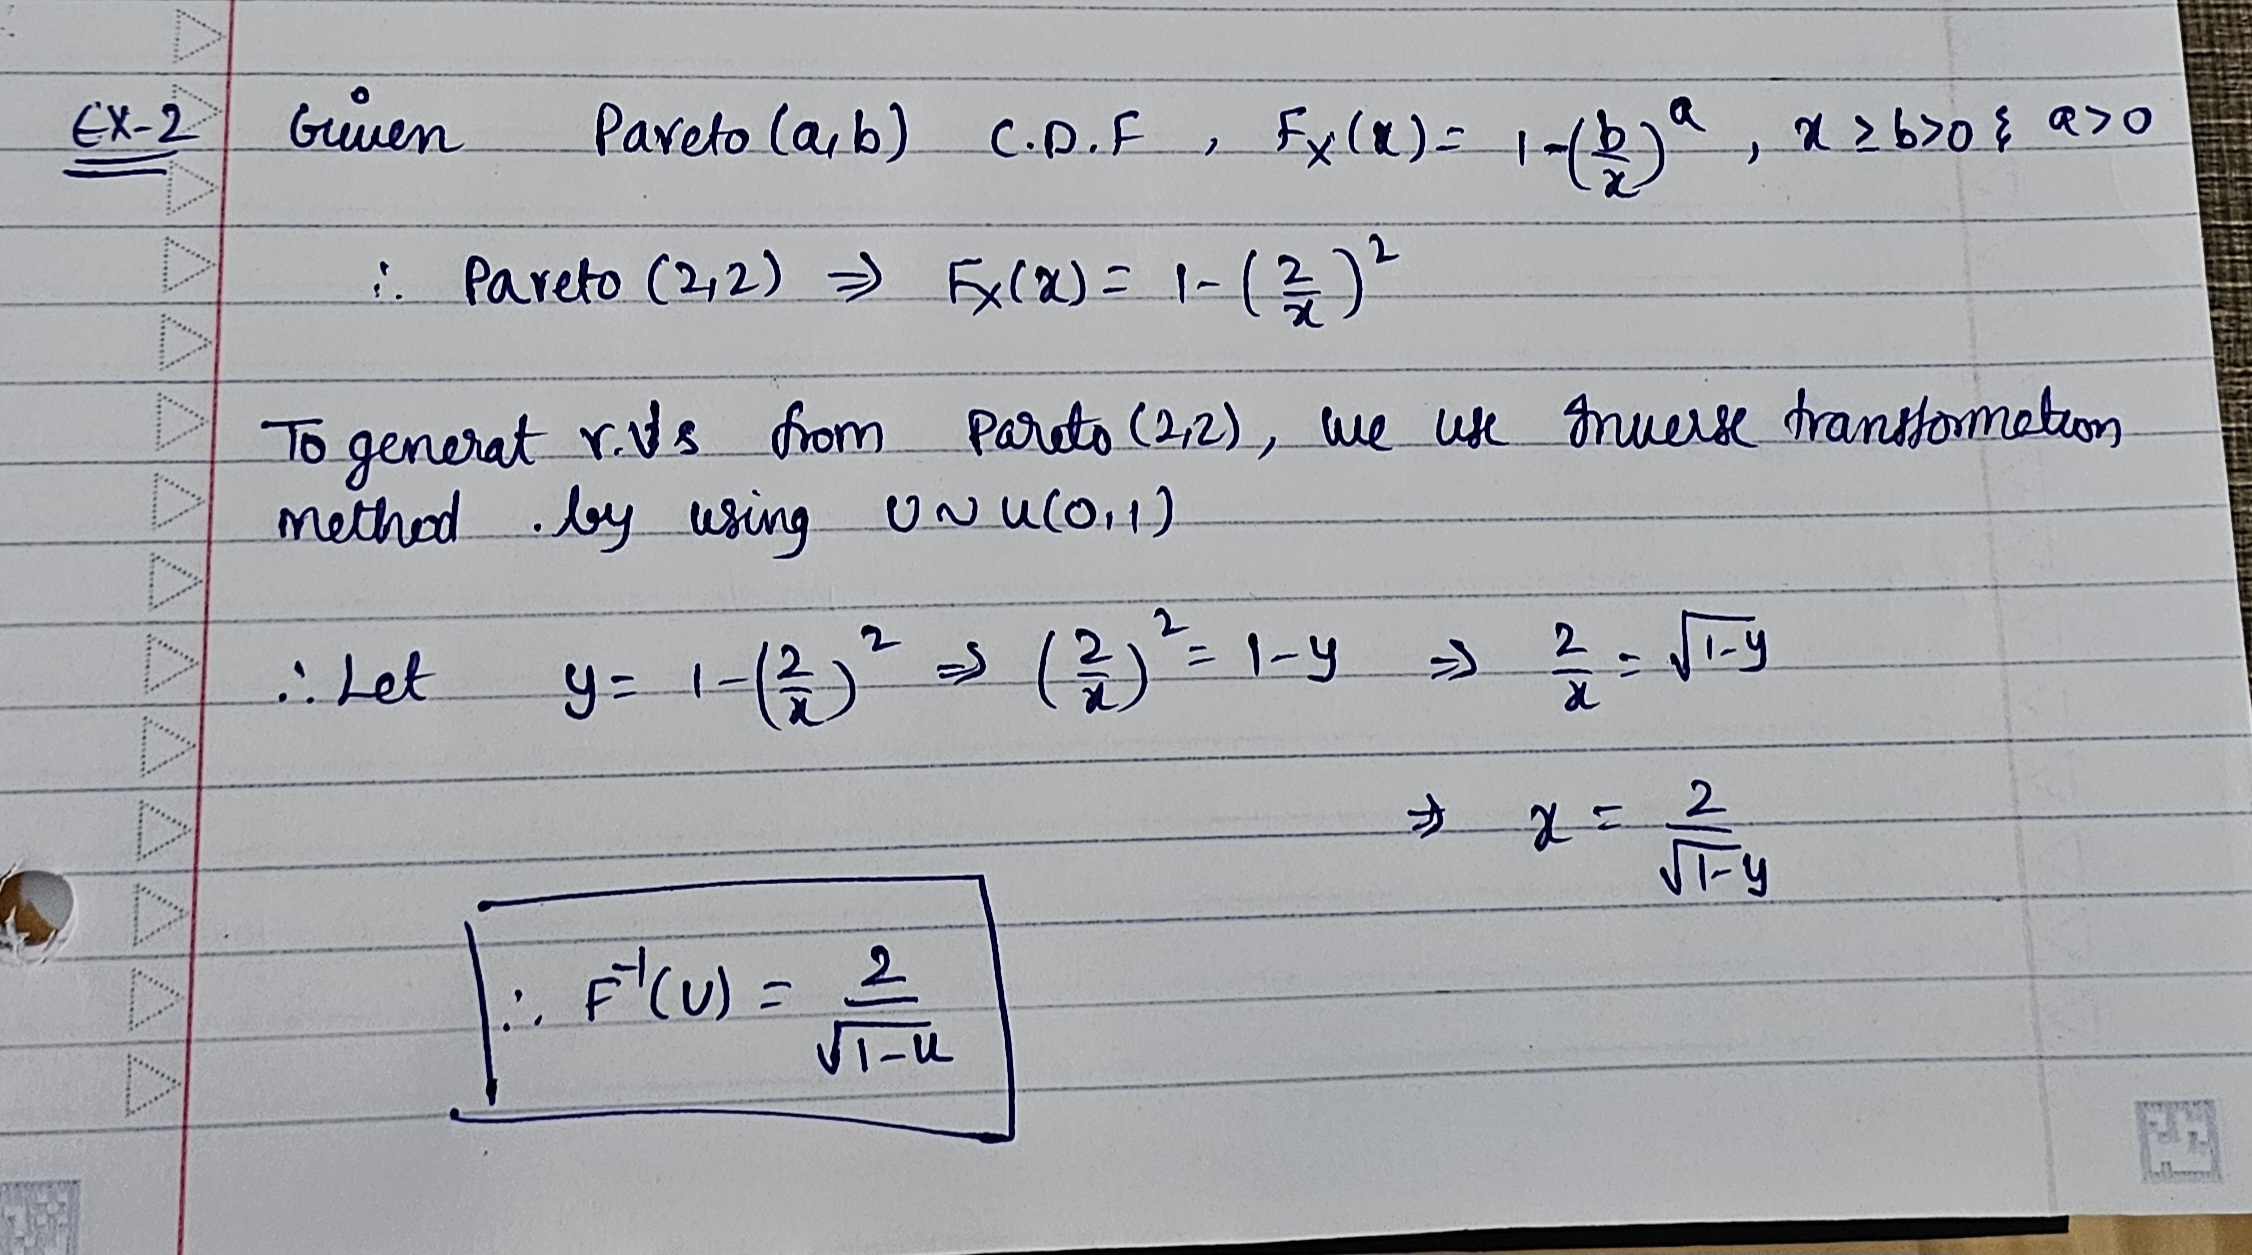

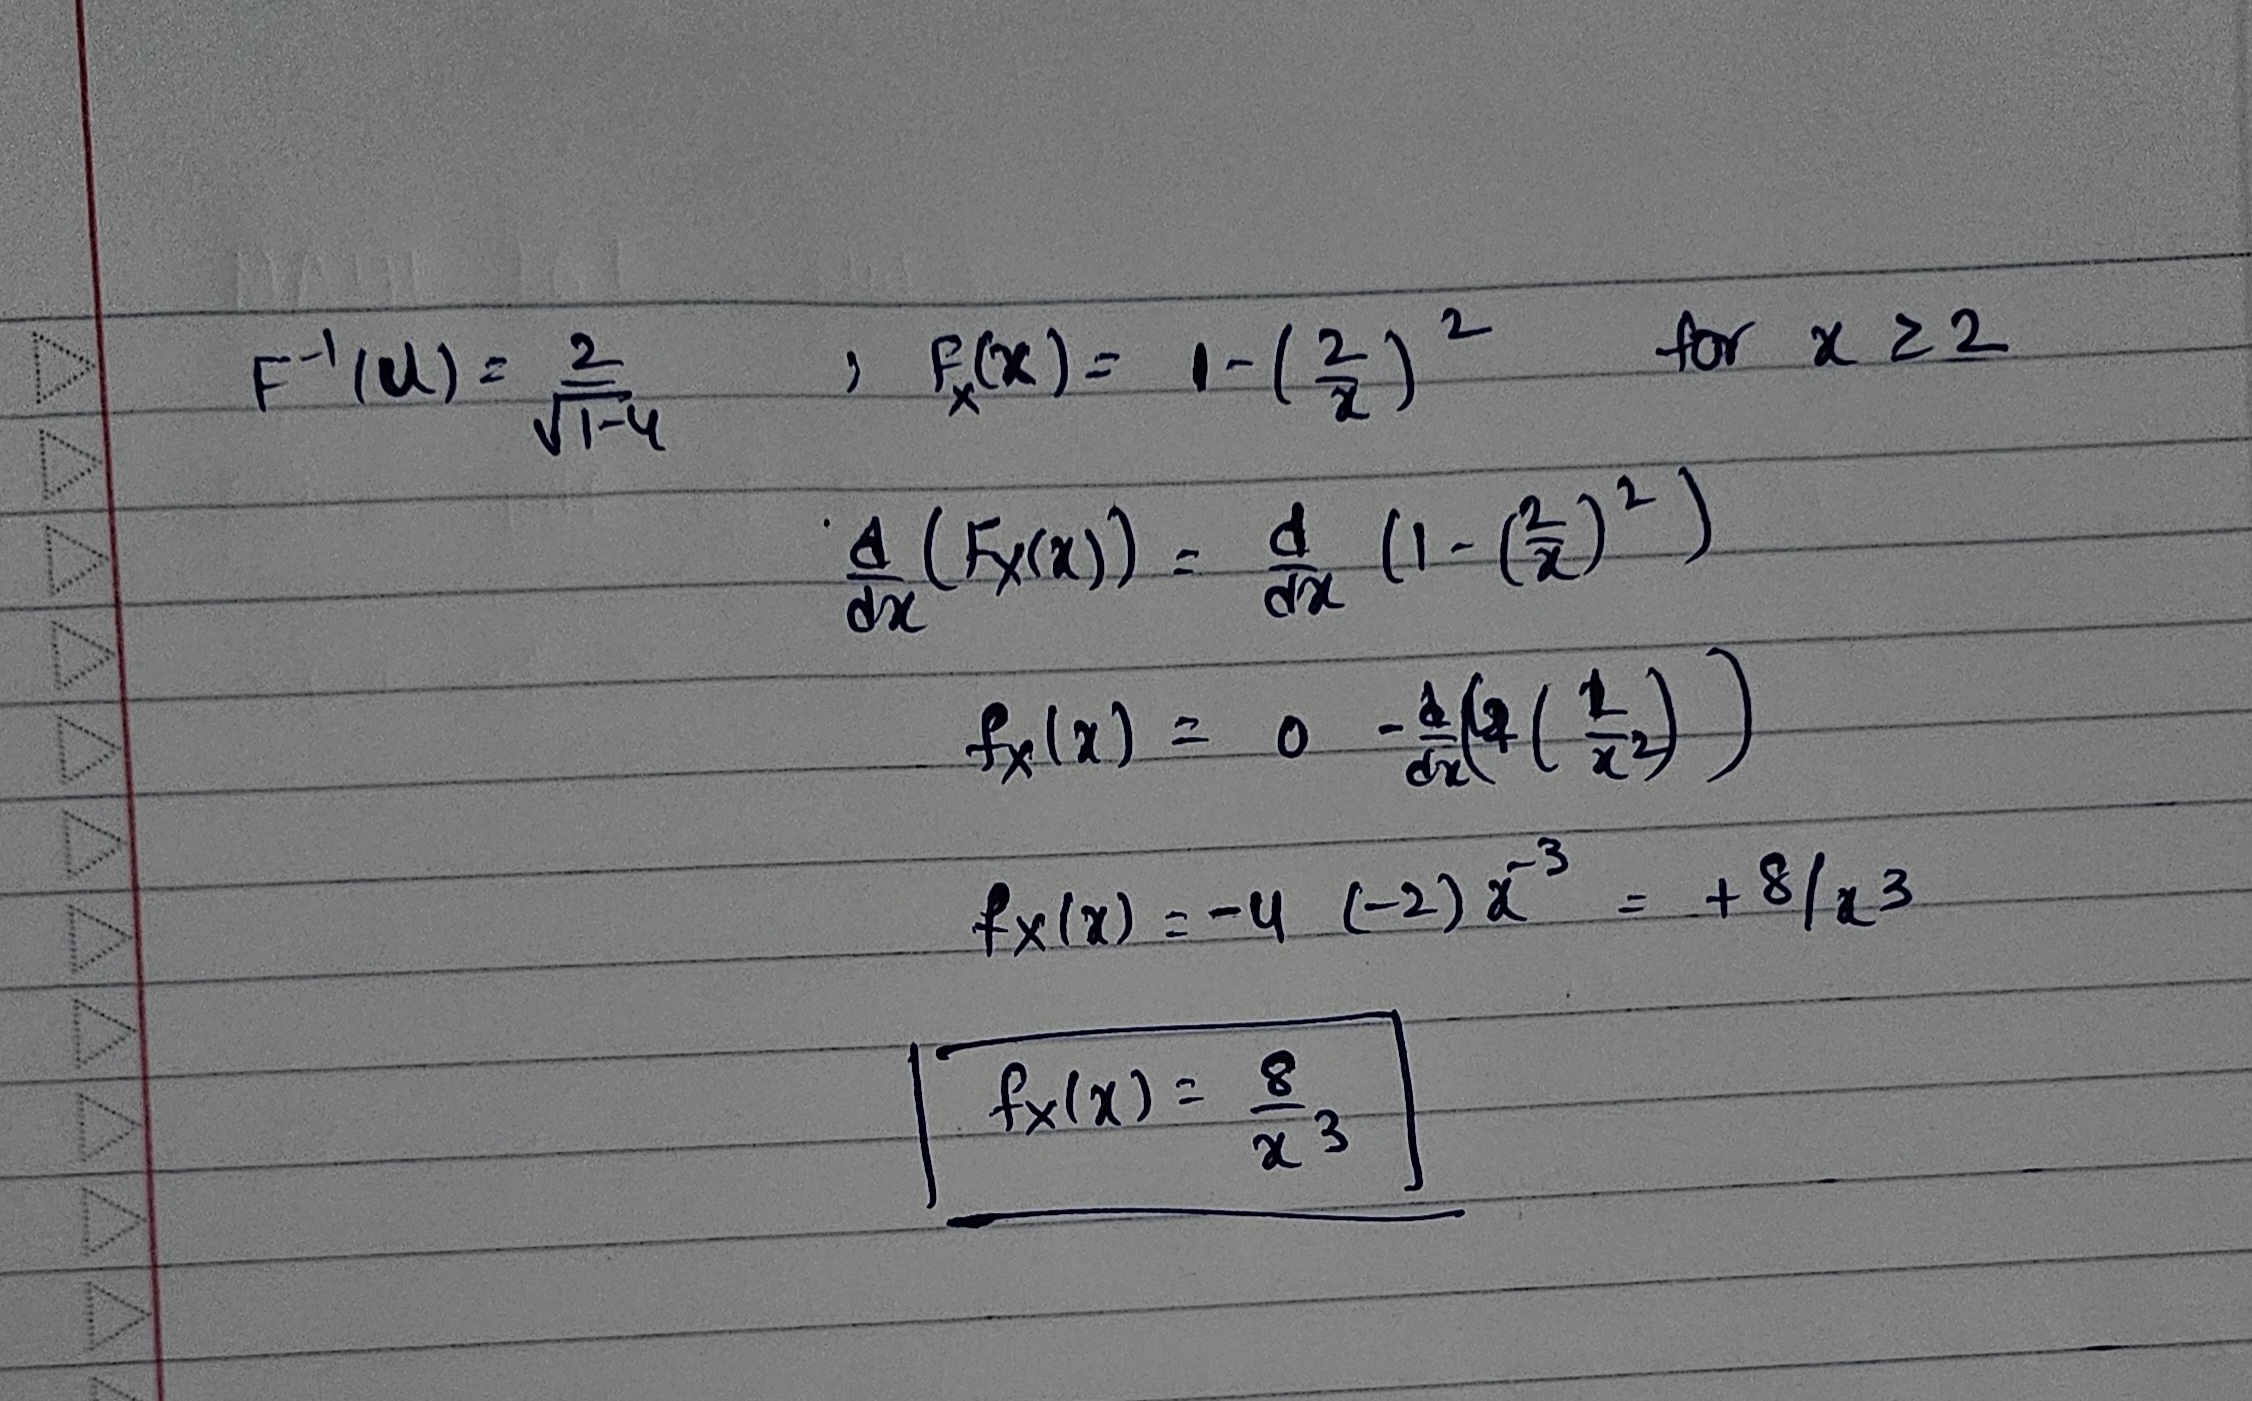

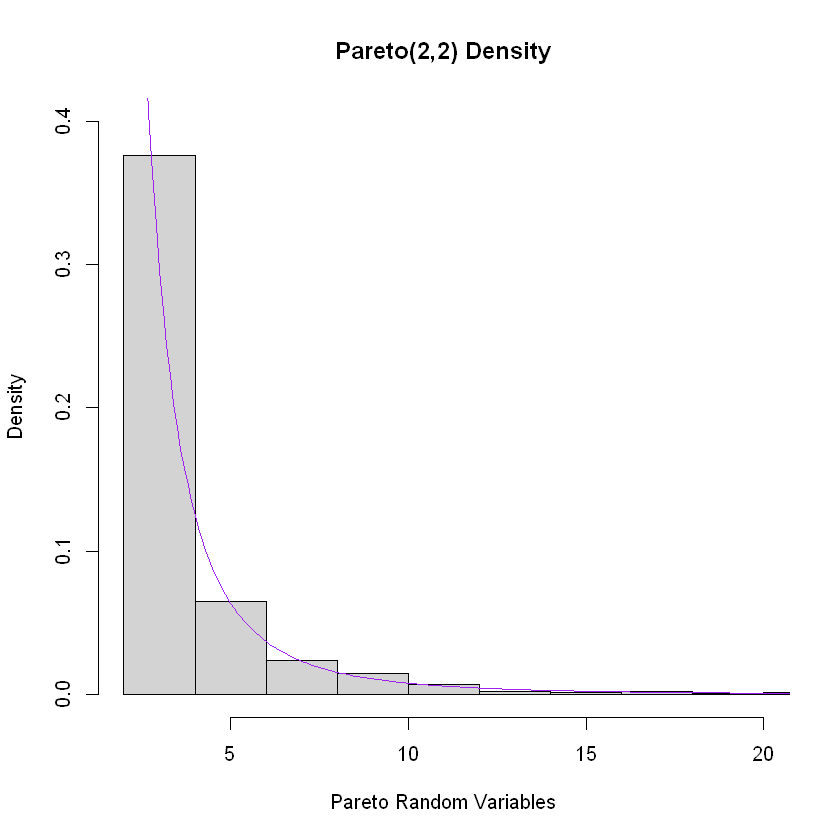

In [1]:
set.seed(1)
pareto_sample_size=1000
uniform_sample=runif(pareto_sample_size,0,1)
#function to create pareto(2,2) sample
inverse_function= function(U){
    return (2/sqrt(1 - U))
}
pareto_inverse_sample=inverse_function(uniform_sample)
#histogram of sample
#xlim is >= 2 as given in the question
hist(pareto_inverse_sample,prob=TRUE,main="Pareto(2,2) Density", xlab="Pareto Random Variables", breaks = 100, xlim=c(2, 20), ylim=c(0,0.4))
#based on pareto(2,2) pdf, generating a sequence to plot pareto density
x <- seq(min(pareto_inverse_sample), max(pareto_inverse_sample), 0.1)
f_x=8/x^3
lines(x,f_x,col="Purple")

### Exercise 3

We proved in class that the inverse probability method works when we define the inverse of y=f(x) as

$x =  inf \{t: f(t)\geq y\}$

This is actually a "pseudo inverse".

If f(x) is a continuous function, it actually has a real inverse, and the proof is less exotic. Please watch this video https://www.youtube.com/watch?v=irheiVXJRm8 that shows how this proof works.

**Write-up Only for this question**

#### a) Try to understand it and then re-write the proof in your own words, as if you were trying to explain it to another student. If you want to handwrite your proof, just make sure to submit it as part of your assignment (along with this file).
#### b) Also summarize what you think are the main differences between the proof we did in class and the proof you wrote up in part a. This can have many answers, but mostly I just want you to think carefully about the two proofs.


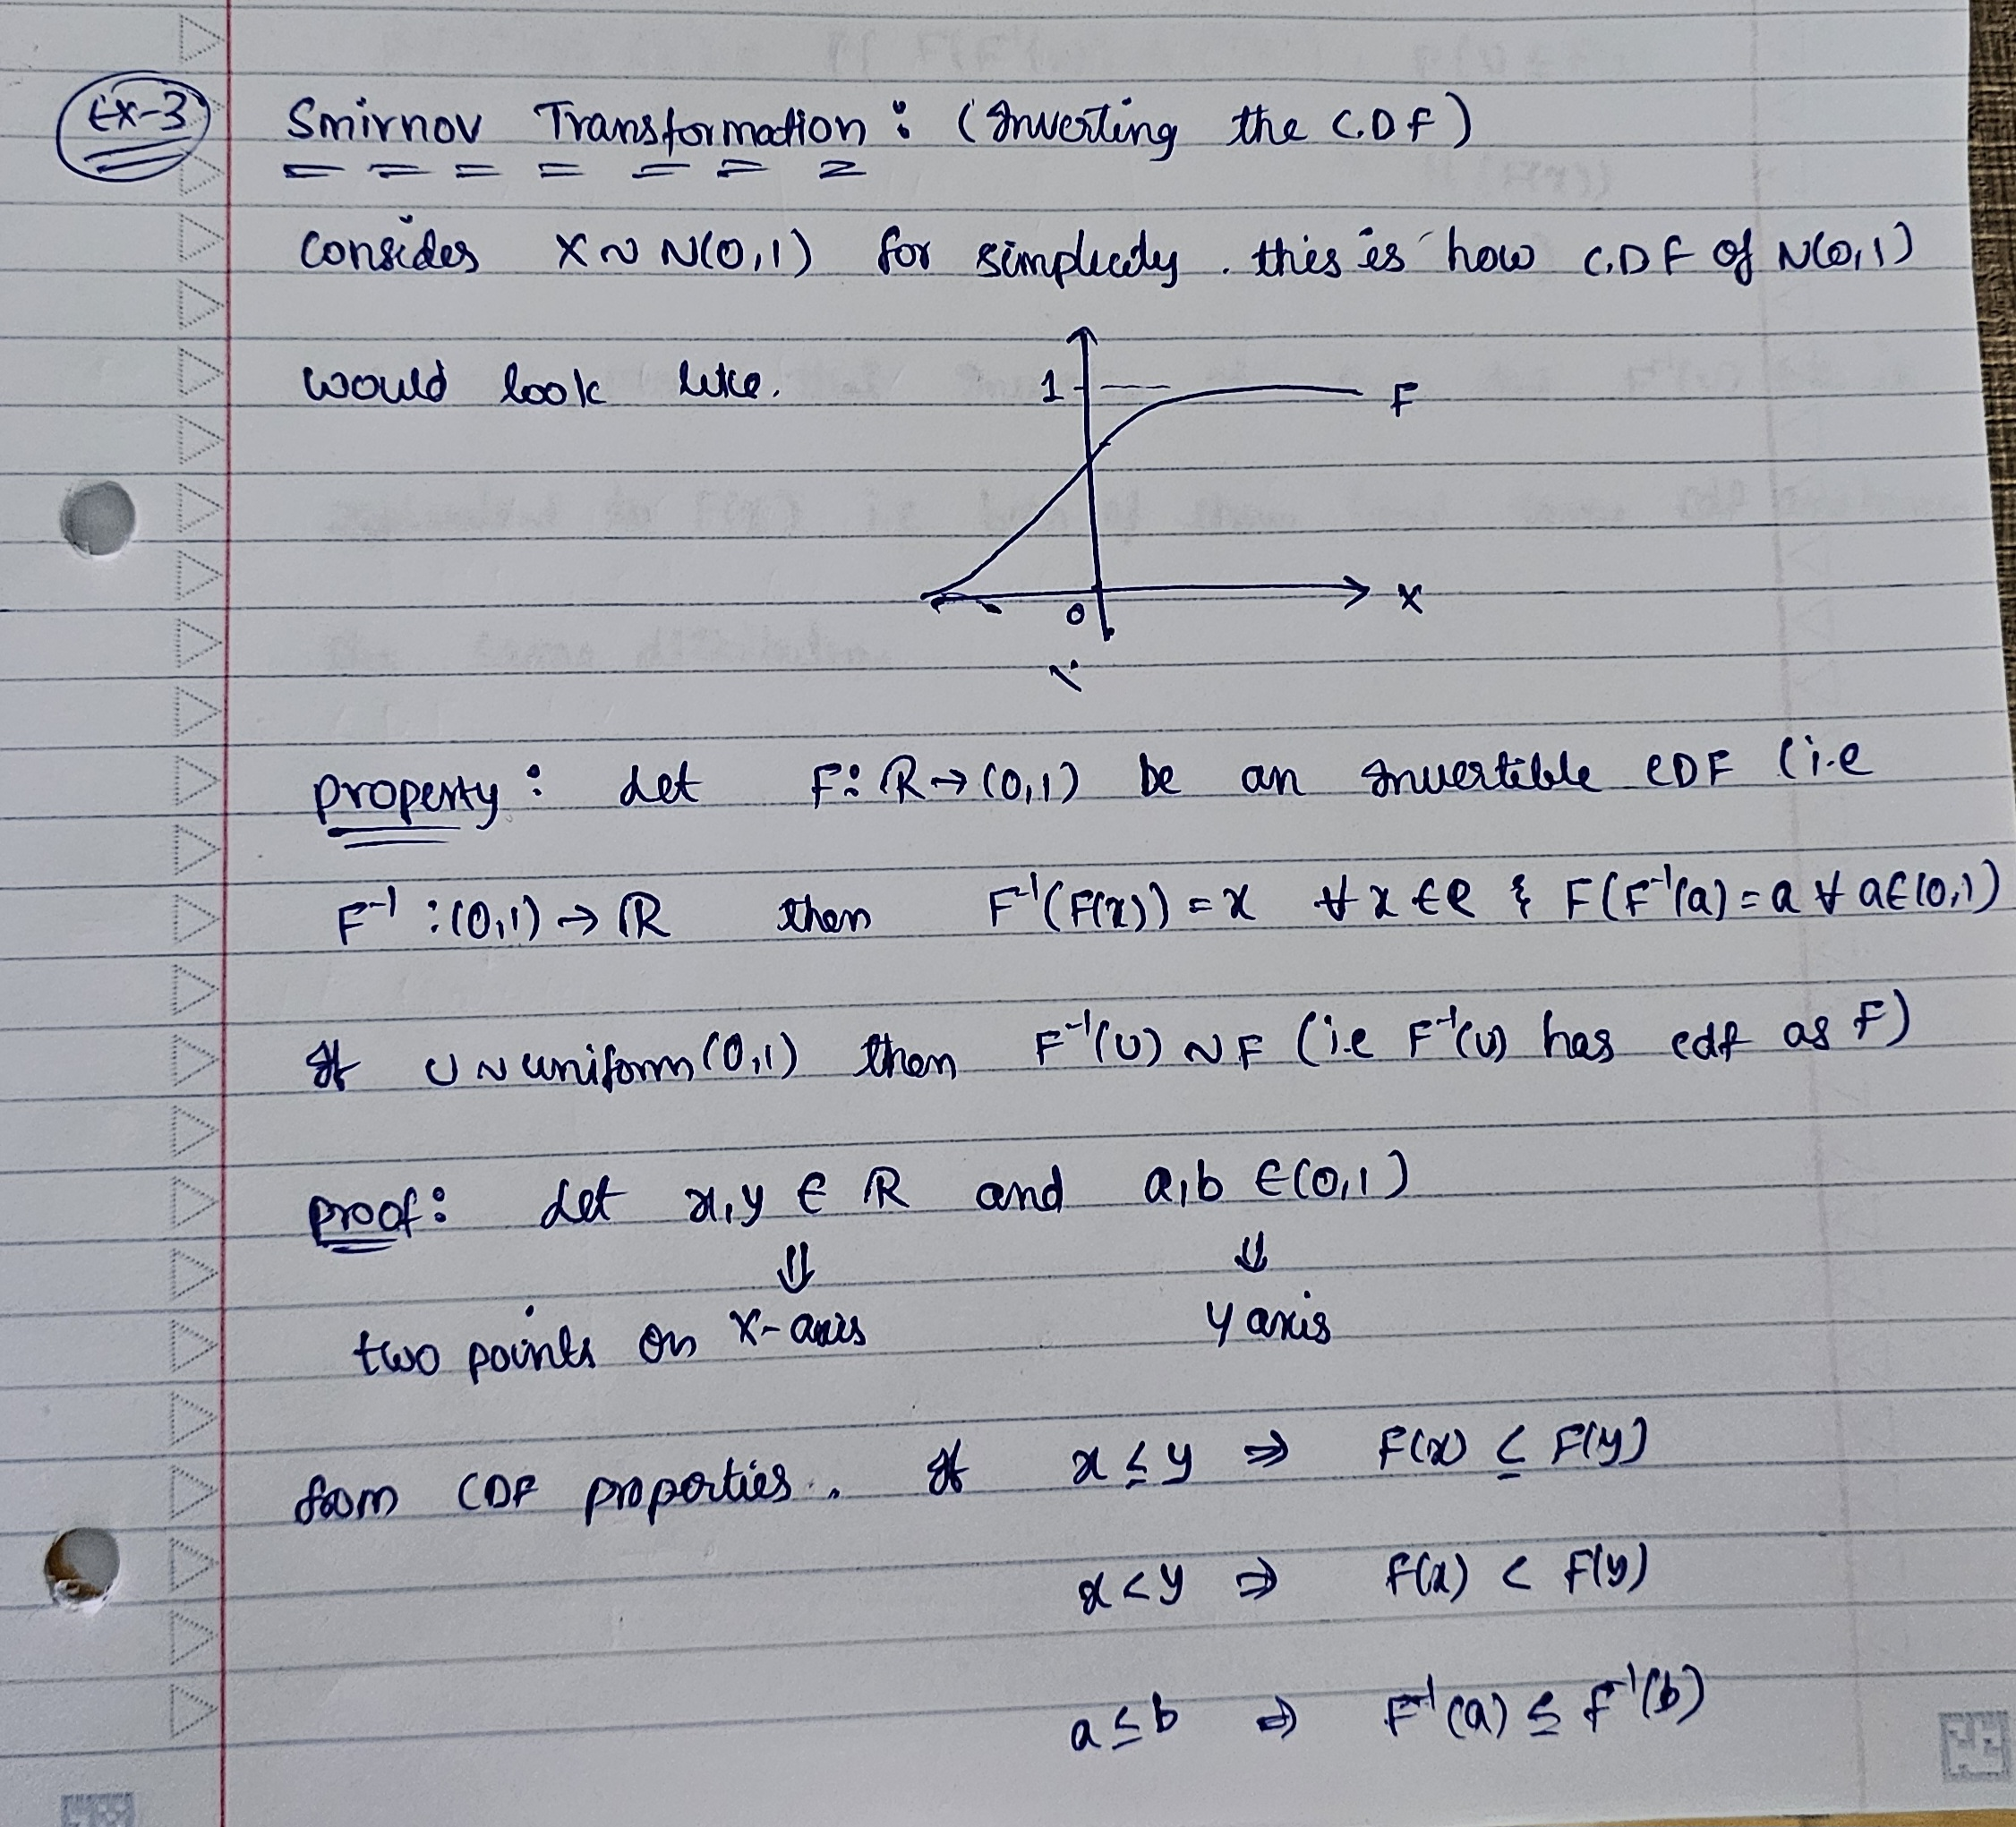

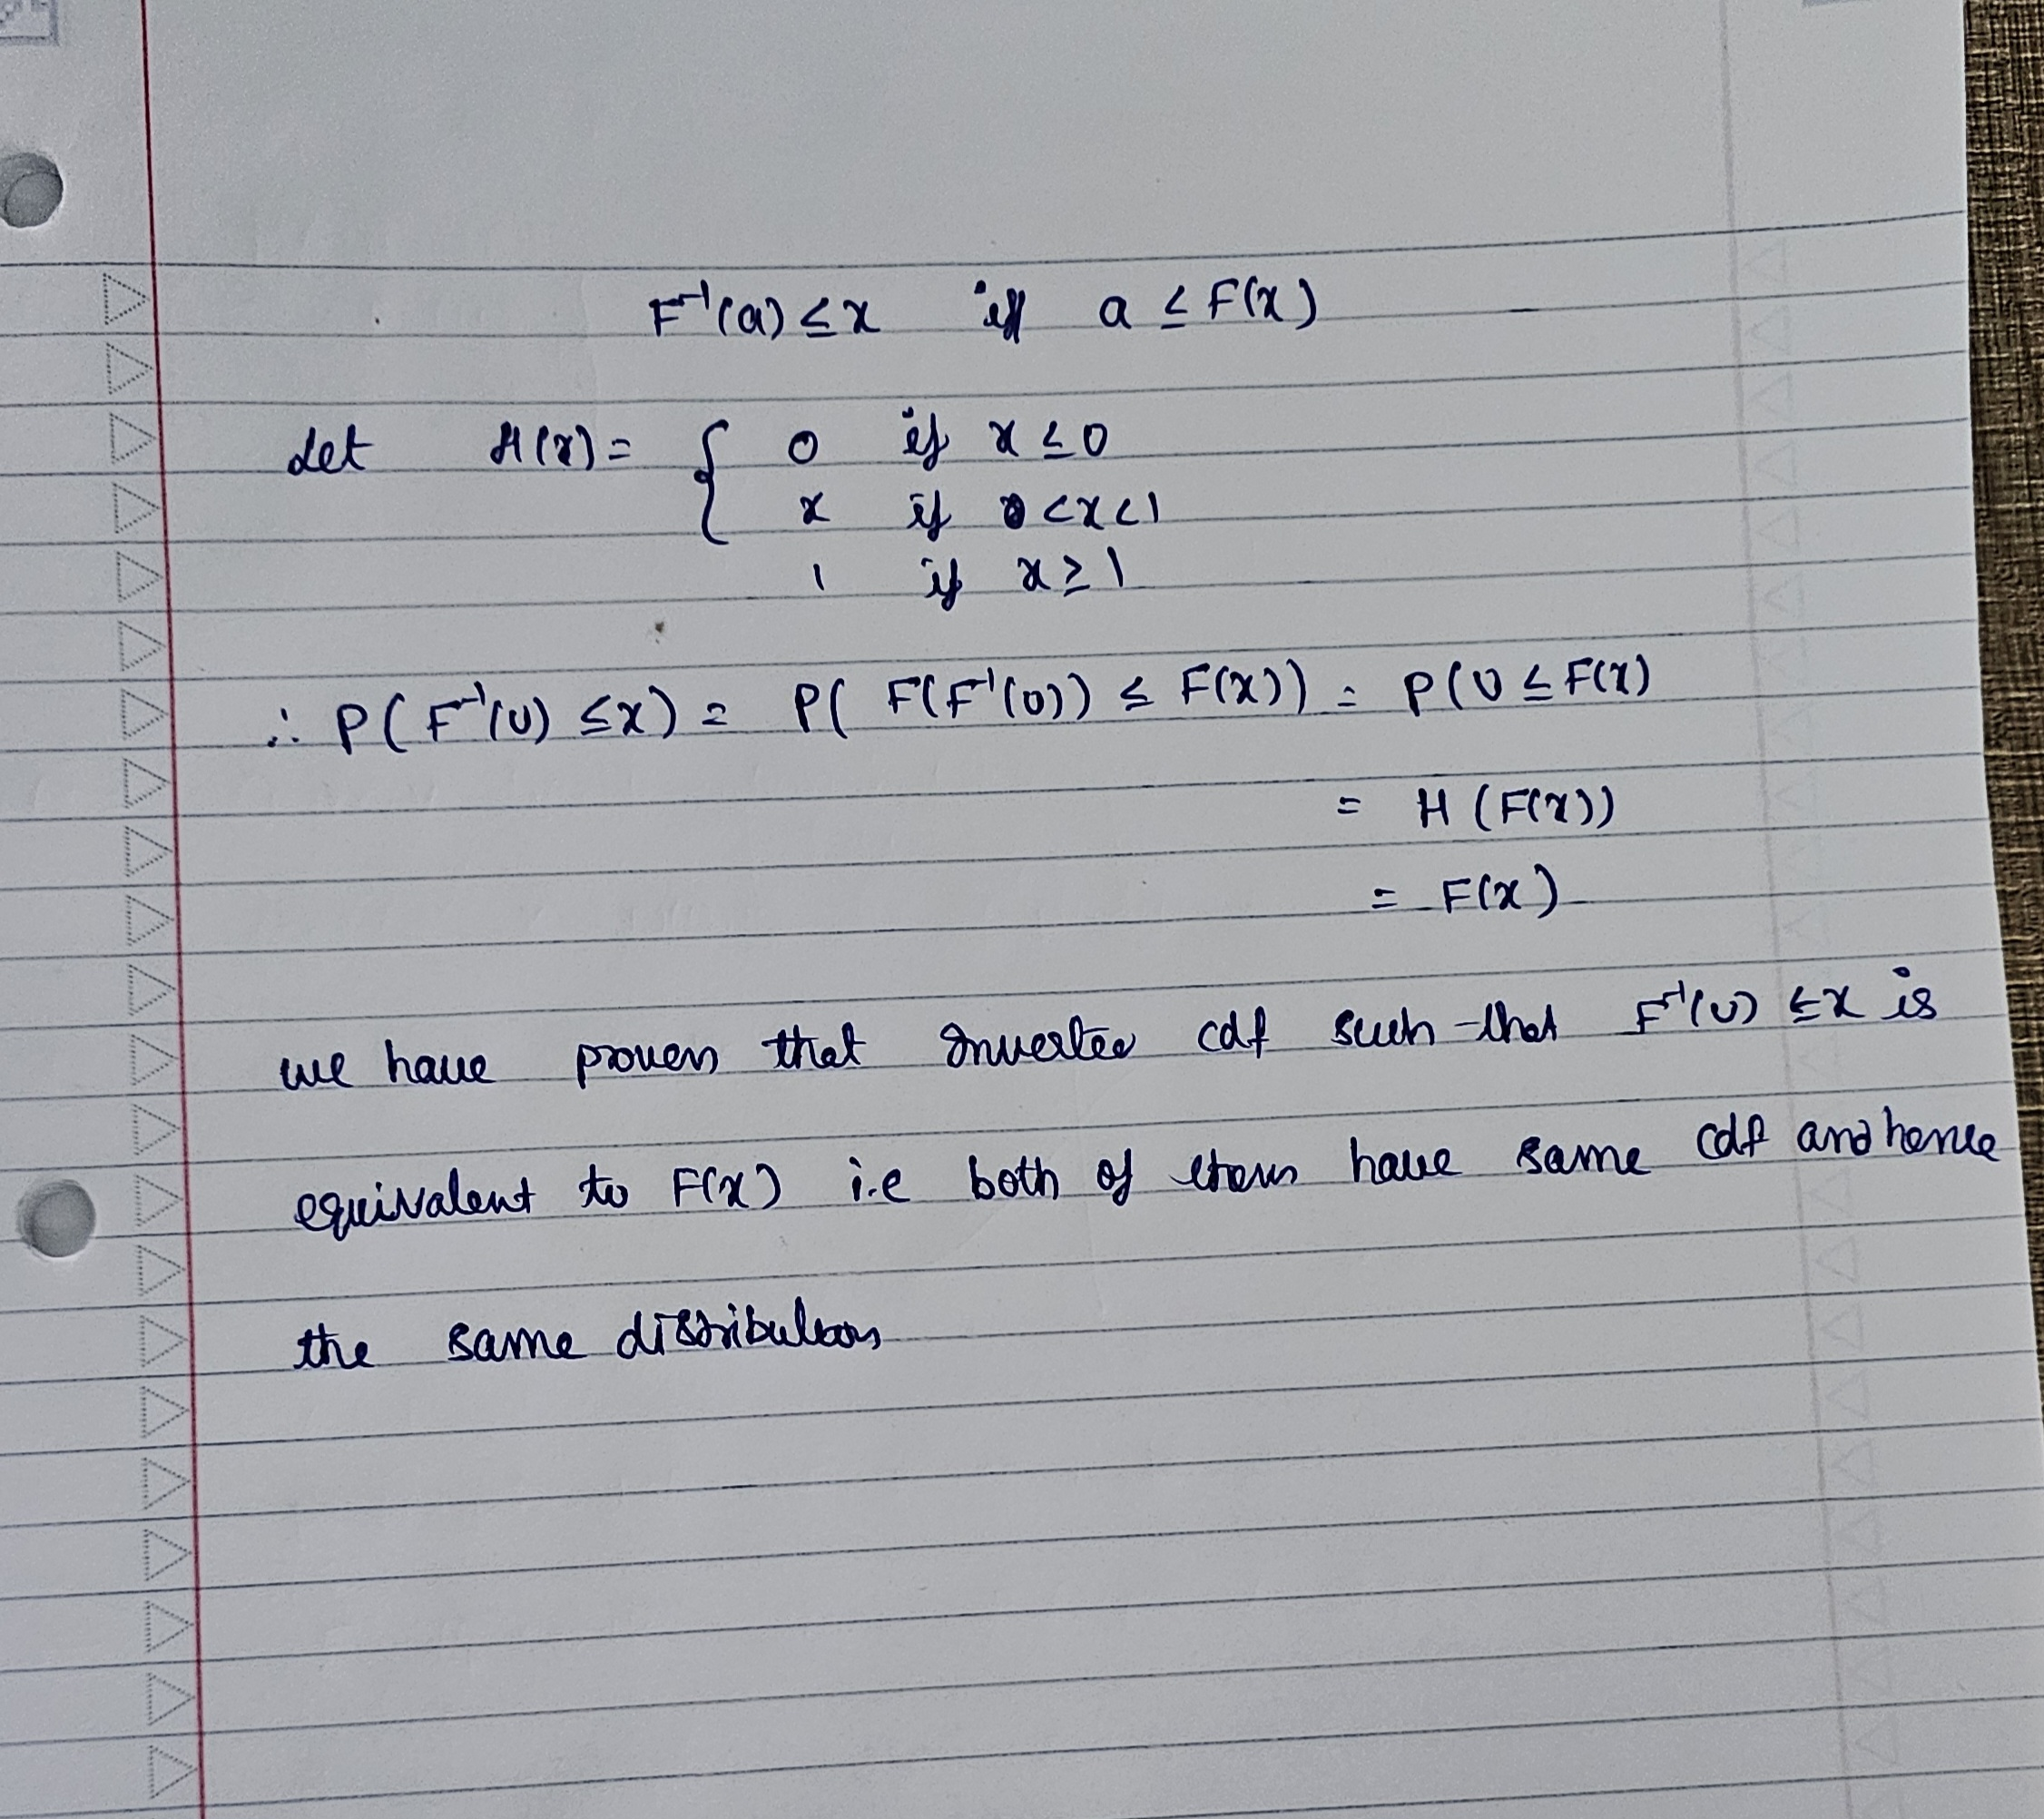

The key difference which i observed between proof from the class and video is, in class we've used montonically increasing property of cdf and right continuity of cdf and then we compared the proof with psuedo inverse defenition X = inf{x : F_X(x) >= u}. In video we used real inverse with std normal example which has one to one mapping unlike psuedo inverse. Real inverse is applicable only for invertible cdf functions.

### Exercise 4

A discrete random variable $X$ has probability mass function

| $x$ | 0 | 1 | 2 | 3 | 4 |
| -------- | -------- | -------- | -------- | -------- | -------- |
| $p(x)$   | 0.1  | 0.2    | 0.2    | 0.2    | 0.3   |

a)  **Explain in Video:** Use the inverse transform method to generate a random sample of size 1000 from the distribution of $X$. Construct a relative frequency table. Also make a bar plot.

Hint: if you set the seed to 1, the first 3 values of X you get should be `1, 2, 3` (I know that's a weird coincidence, but that's really the order of the first three rvs).

b) **Explain in Video:** Now instead use R's built in `sample` function to generate a random sample of size 1000 from the distribution of $X$. Construct a relative frequency table. Also make a bar plot.

Hint: if you set the seed to 1, the first 3 values of X you get should be `4, 2, 3`.

c) **Write only** Compare the empirical (the relative frequencies you got from the sample) with the theoretical probabilities and with the relative frequencies you get from using the `sample` function.


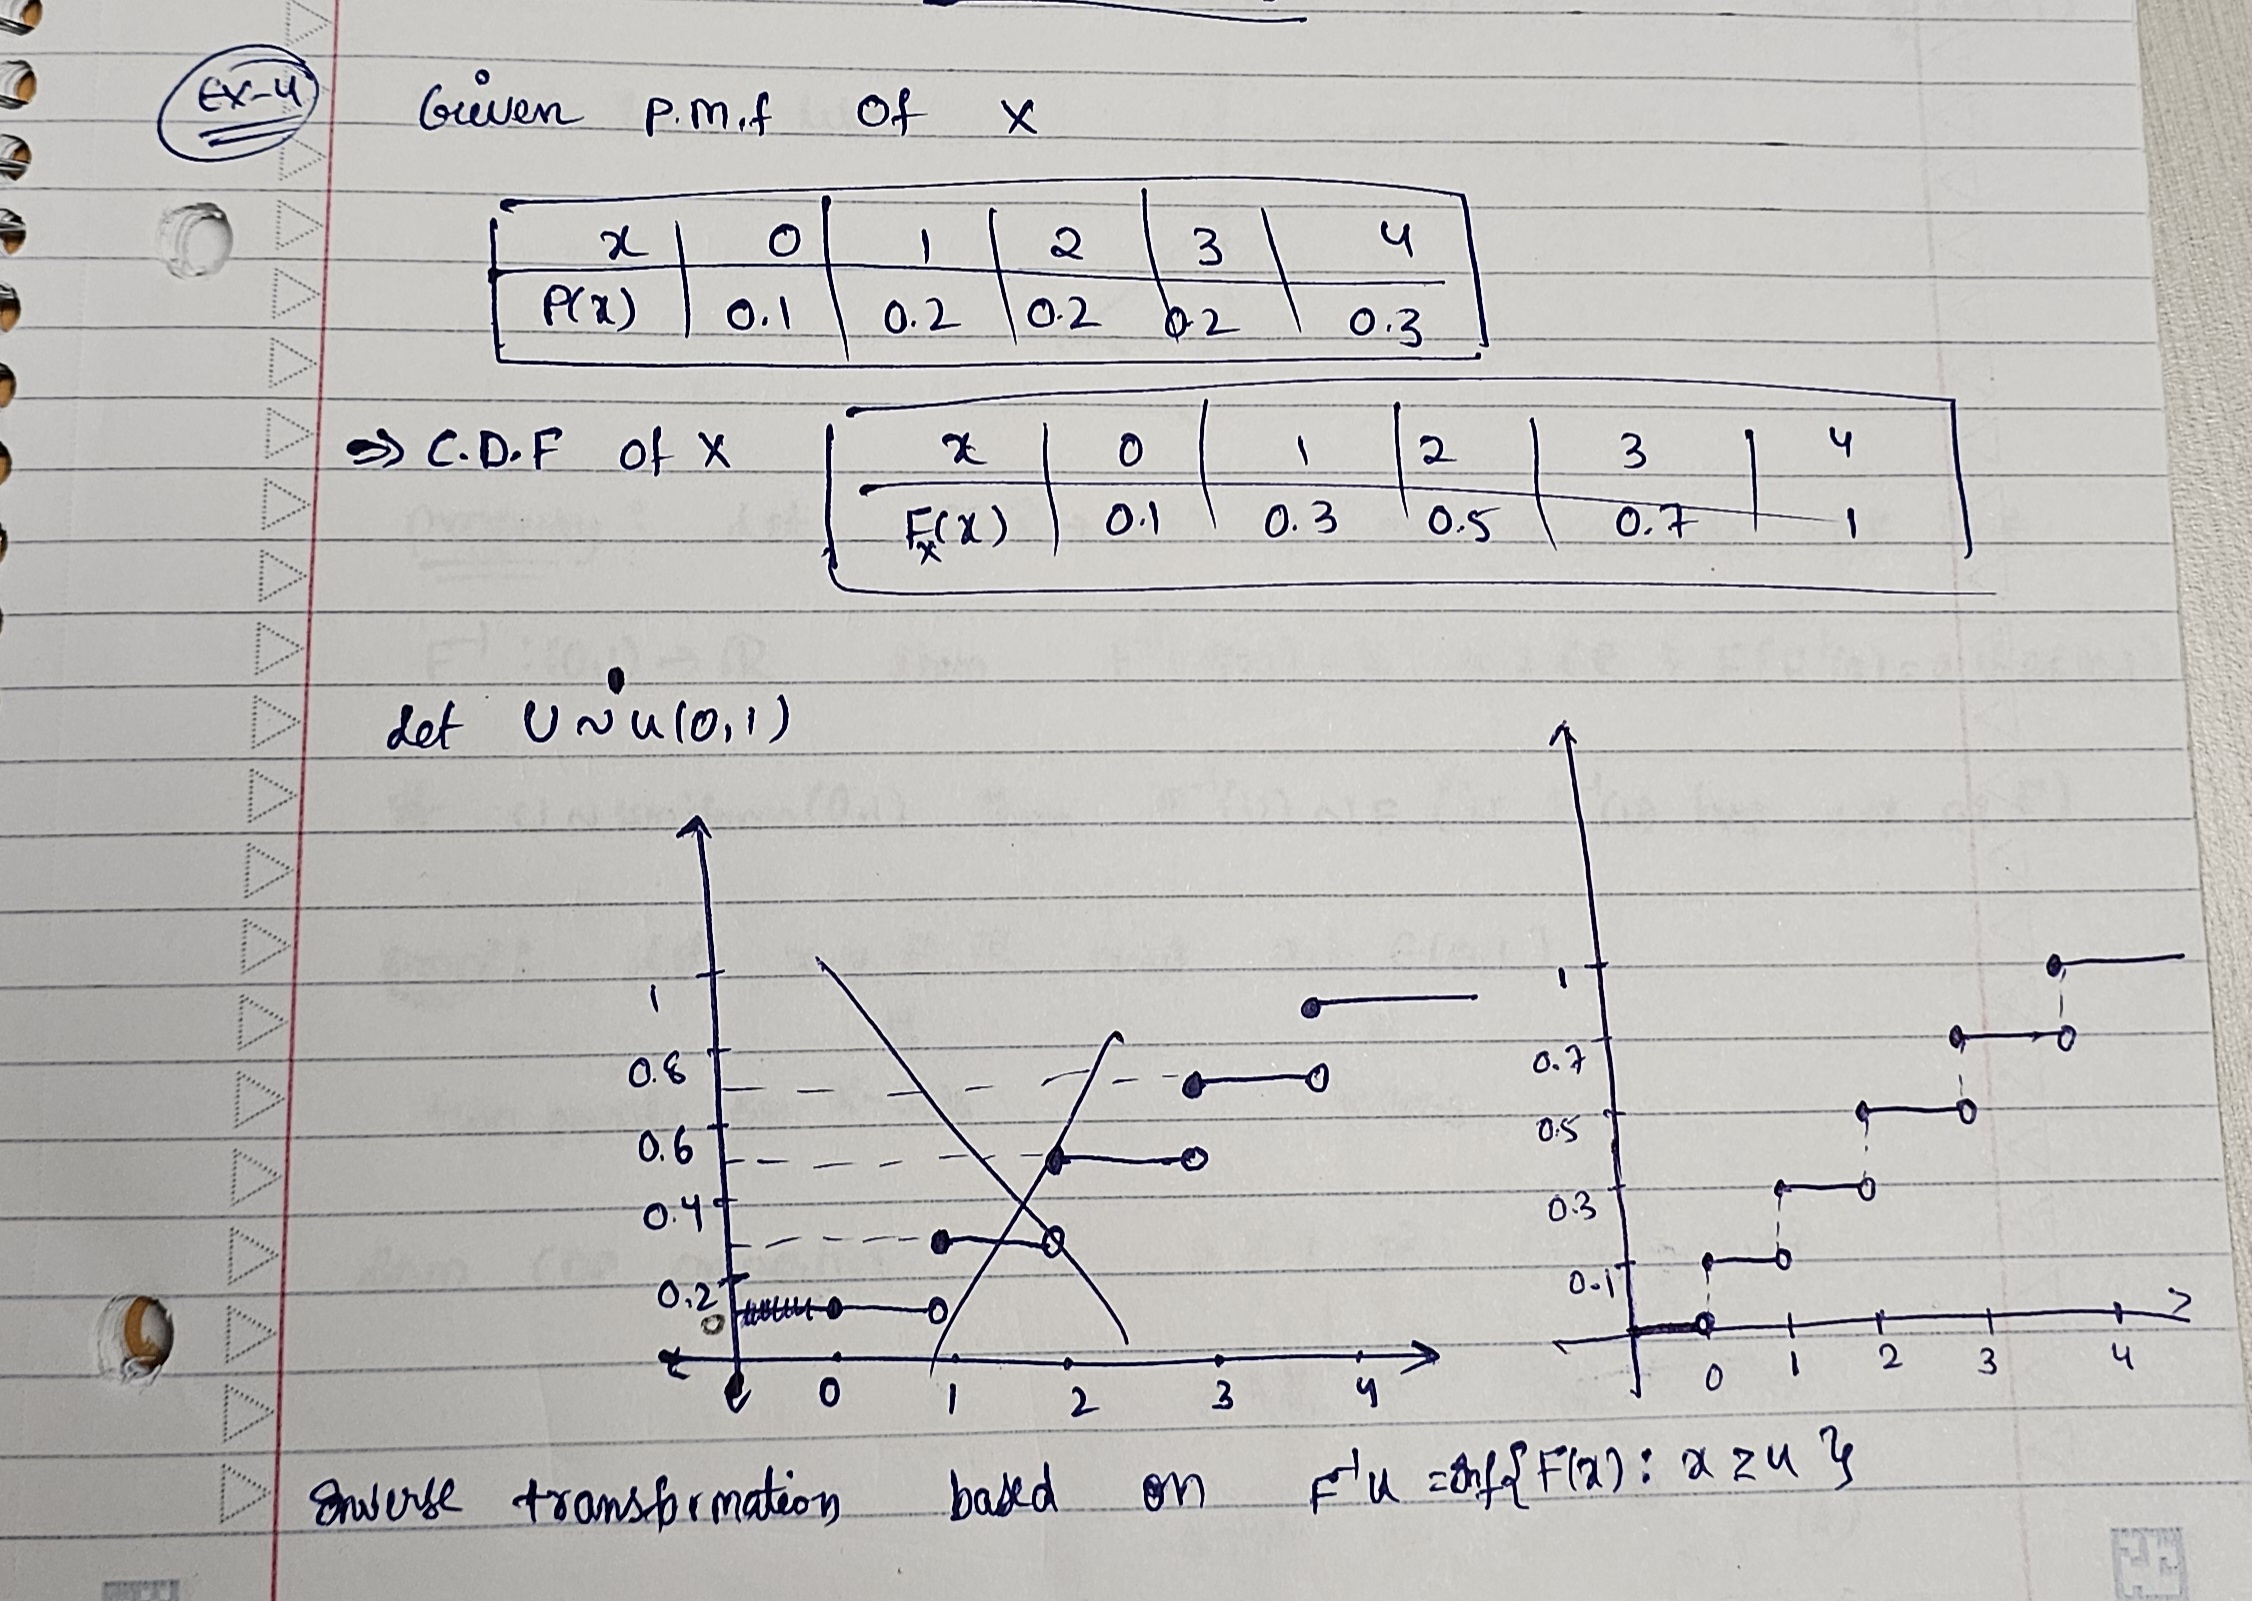

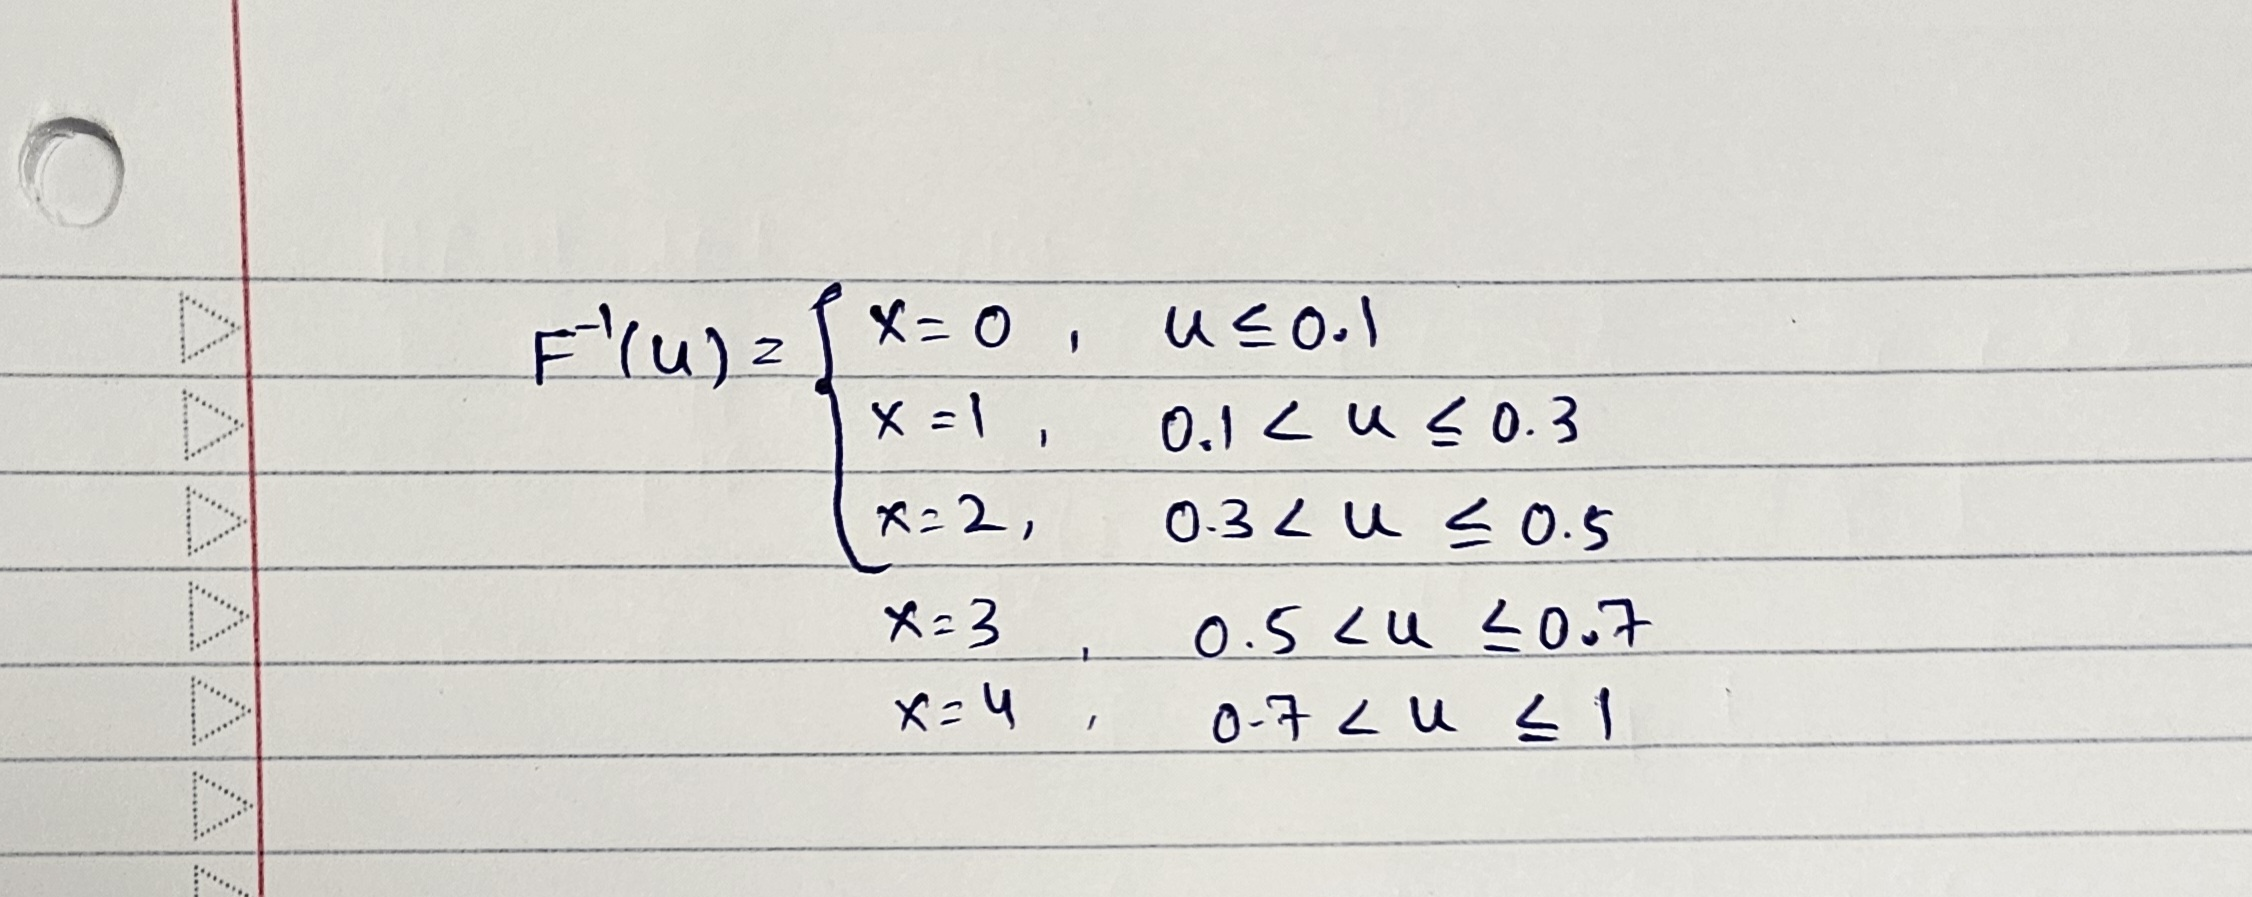

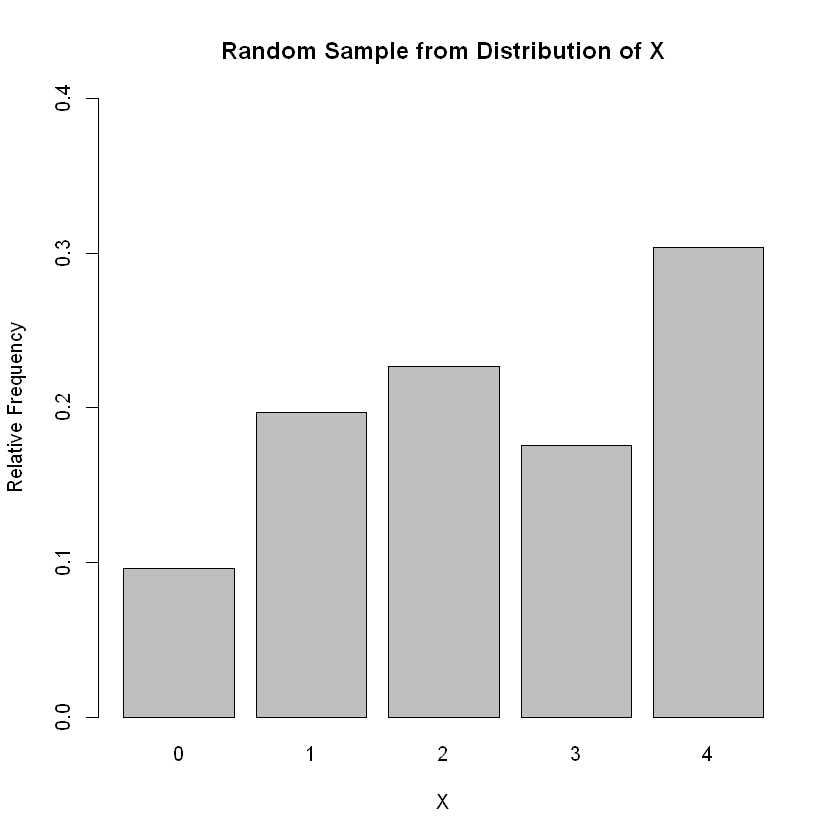

In [2]:
set.seed(1)
sample_size=1000
#from pmf we can define cdf of X
CDF_X <- c(0.1, 0.3, 0.5, 0.7, 1.0)
uniform_sample=runif(sample_size,0,1)
inverse_sample=rep(NA,sample_size)

for(obs in 1:sample_size){
  if (uniform_sample[obs] <= CDF_X[1]) {
    inverse_sample[obs] <- 0
  } else if (uniform_sample[obs] <= CDF_X[2]) {
    inverse_sample[obs] <- 1
  } else if (uniform_sample[obs] <= CDF_X[3]) {
    inverse_sample[obs] <- 2
  } else if (uniform_sample[obs] <= CDF_X[4]) {
    inverse_sample[obs] <- 3
  } else {
    inverse_sample[obs] <- 4
  }
}

relative_freq_inverse <- table(inverse_sample) / sample_size
barplot(relative_freq_inverse, main = "Random Sample from Distribution of X", xlab = "X", ylab = "Relative Frequency", ylim = c(0, 0.4))

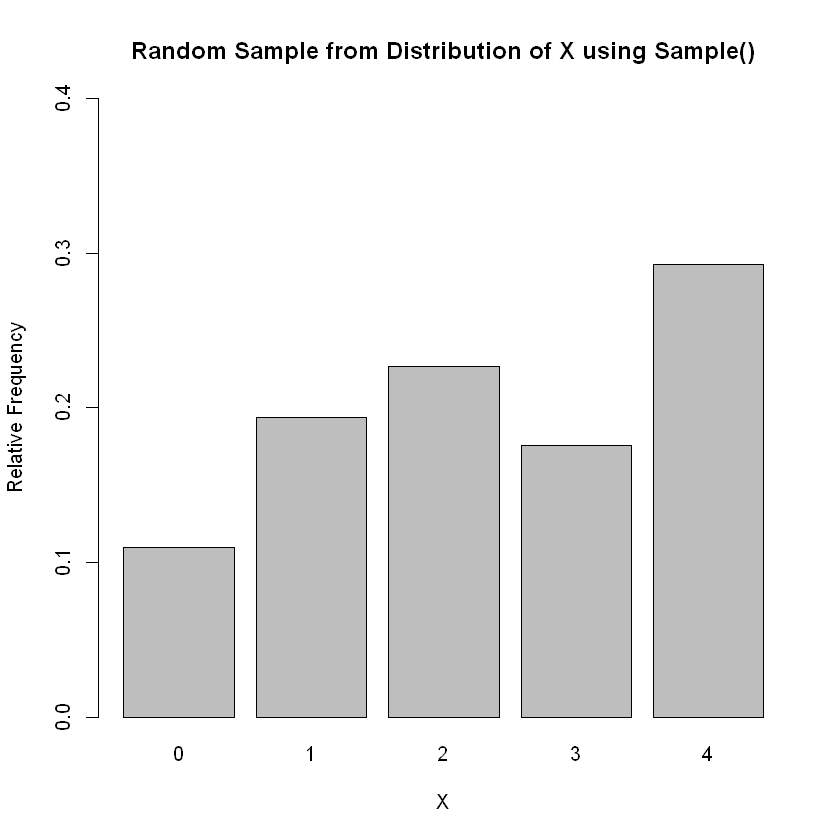

In [3]:
#Using sample function generating random sample from distribution of X
set.seed(1)
sample_size=1000
pmf_x=c(0.1, 0.2, 0.2, 0.2, 0.3)

# Generate the sample using the sample() function
sample_X <- sample(x = 0:4, size = sample_size, replace = TRUE,prob=pmf_x)
relative_freq_sample <- table(sample_X) / sample_size
barplot(relative_freq_sample, main = "Random Sample from Distribution of X using Sample()", xlab = "X", ylab = "Relative Frequency", ylim = c(0, 0.4))

Sample & Inverse Transform method are generating very much similar results.

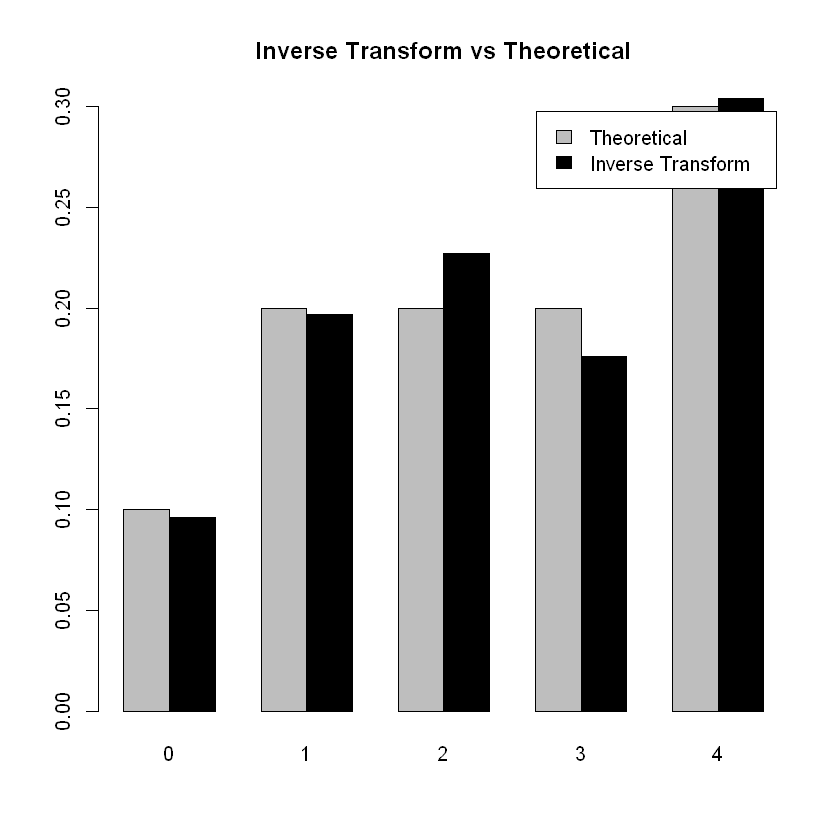

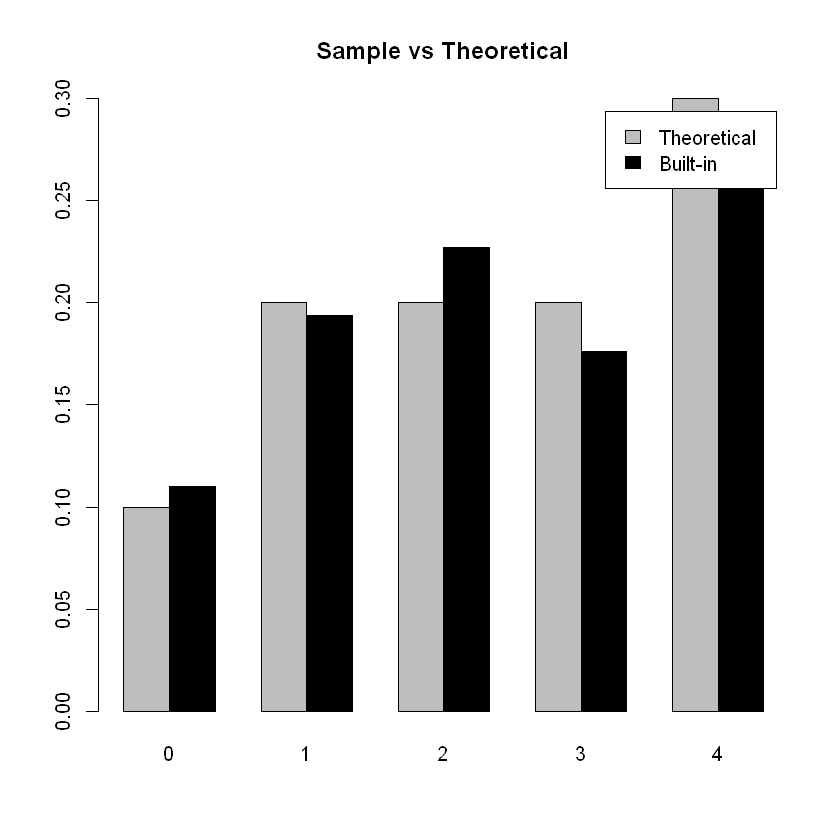

In [4]:
comparison_df <- data.frame(
  X = 0:4,
  Theoretical_Prob = pmf_x,
  Relative_Freq_Inverse = as.numeric(relative_freq_inverse),
  Relative_Freq_Sample = as.numeric(relative_freq_sample)
)

# Plot 1: Inverse Transform Method vs Theoretical
barplot(height = t(as.matrix(comparison_df[, c("Theoretical_Prob", "Relative_Freq_Inverse")])),
        beside = TRUE, col = c("grey", "black"), names.arg = comparison_df$X,
        main = "Inverse Transform vs Theoretical",
        legend = c("Theoretical", "Inverse Transform"))

# Plot 2: Sample Function vs Theoretical
barplot(height = t(as.matrix(comparison_df[, c("Theoretical_Prob", "Relative_Freq_Sample")])),
        beside = TRUE, col = c("grey", "black"), names.arg = comparison_df$X,
        main = "Sample vs Theoretical",
        legend = c("Theoretical", "Built-in"))

The relative frequencies from both the inverse transform method and the sample function are quite consistent with the theoretical probabilities across all values of X.